In [1]:
# Import libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.callbacks import EarlyStopping
from keras.optimizers.legacy import Adam
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# Preprocess all train images
train_set = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

Found 28821 images belonging to 7 classes.


In [4]:
# Preprocess all test images
test_set = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

Found 7066 images belonging to 7 classes.


In [5]:
# Configuration
input_shape = (48, 48, 1)
output_class = 7

In [6]:
# Model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=input_shape))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
emotion_model.add(BatchNormalization())
emotion_model.add(Activation('relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())

# Fully connected layer
emotion_model.add(Dense(512, activation='relu'))
emotion_model.add(BatchNormalization())
emotion_model.add(Dropout(0.5))

# Output layer
emotion_model.add(Dense(output_class, activation='softmax'))

# Compile the model
emotion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)


In [7]:
# Check layers and parameters in the model
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        1

In [8]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_set,
        steps_per_epoch=28821 // 64,
        epochs=50,
        validation_data=test_set,
        validation_steps=7066 // 64,
        callbacks=[early_stopping])

Epoch 1/50
450/450 [==============================] - 108s 238ms/step - loss: 1.8407 - accuracy: 0.3310 - val_loss: 1.8765 - val_accuracy: 0.3648
Epoch 2/50
450/450 [==============================] - 140s 311ms/step - loss: 1.4776 - accuracy: 0.4326 - val_loss: 1.4154 - val_accuracy: 0.4565
Epoch 3/50
450/450 [==============================] - 161s 358ms/step - loss: 1.3799 - accuracy: 0.4711 - val_loss: 1.3281 - val_accuracy: 0.5004
Epoch 4/50
450/450 [==============================] - 188s 419ms/step - loss: 1.3283 - accuracy: 0.4958 - val_loss: 1.3517 - val_accuracy: 0.4855
Epoch 5/50
450/450 [==============================] - 176s 392ms/step - loss: 1.2838 - accuracy: 0.5120 - val_loss: 1.3816 - val_accuracy: 0.4839
Epoch 6/50
450/450 [==============================] - 176s 391ms/step - loss: 1.2515 - accuracy: 0.5243 - val_loss: 1.3496 - val_accuracy: 0.4879
Epoch 7/50
450/450 [==============================] - 189s 420ms/step - loss: 1.2194 - accuracy: 0.5441 - val_loss: 1.4152 -

In [9]:
emotion_model.evaluate(x=test_set)

111/111 [==============================] - 12s 104ms/step - loss: 1.1158 - accuracy: 0.5866


[1.1157759428024292, 0.5866119265556335]

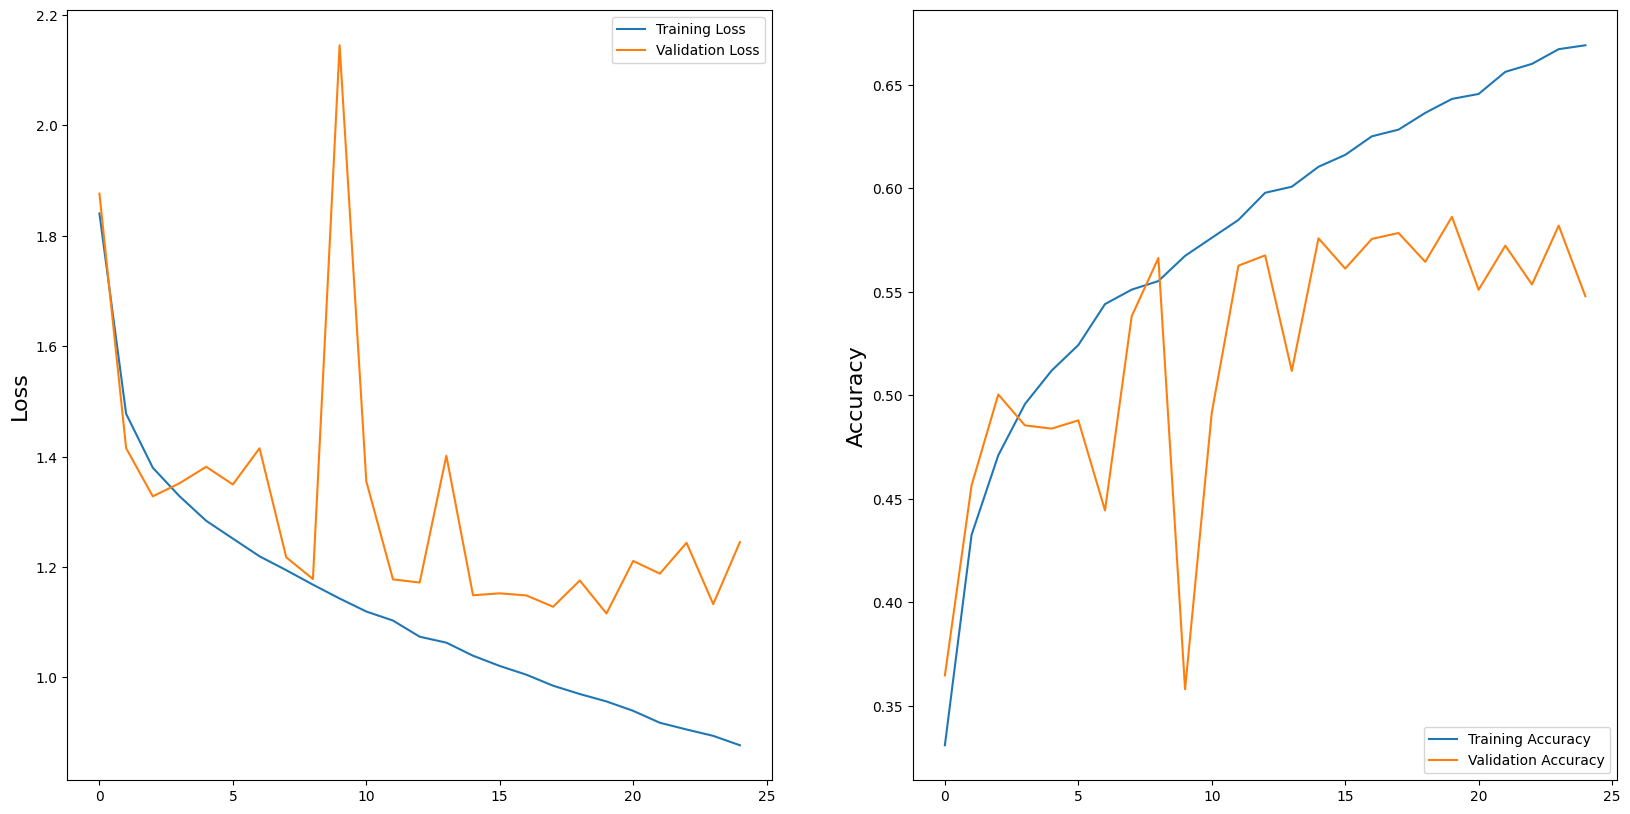

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy score
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion_model_info.history['accuracy'], label='Training Accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()

In [11]:
# Save trained model in .h5 file
emotion_model.save('models/emotion_model_2.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
